# Course: Text Mining Project (5980UE)

University of Passau

by 

[__Prof. Siegfried Handschuh__ (siegfried.handschuh@uni-passau.de)]( http://www.fim.uni-passau.de/en/digital-libraries/)


The lecture is based on the book [Natural Language Processing with Python](http://www.nltk.org/book/) by Steven Bird, Ewan Klein, and Edward Loper


__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)




# Class 2: Accessing Text Corpora and Lexical Resources
Practical work in Natural Language Processing typically uses large bodies of linguistic data, or corpora. 

## 1. Accessing Text Corpora
A text corpus is a large body of text. In **Class 1**, we examined some pre-defined small text collections. However, since we want to be able to work with other texts, this section examines a variety of text corpora. We'll see how to select individual texts, and how to work with them. 
### 1.1   Gutenberg Corpus

In [1]:
import nltk

NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/. We begin by getting the Python interpreter to load the NLTK package, then ask to see `nltk.corpus.gutenberg.fileids()`, the file identifiers in this corpus:

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Let's pick out the first of these texts — Emma by Jane Austen — and give it a short name, emma, then find out how many words it contains:

In [3]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

### Exercise

<div class="alert alert-info">
Carry out the concordance analysis for the word *suprise* within the text *Emma* 
</div>

When we defined emma, we invoked the `words()` function of the gutenberg object in NLTK's corpus package. But since it is cumbersome to type such long names all the time, Python provides another version of the `import` statement, as follows:

In [4]:
from nltk.corpus import gutenberg
gutenberg.fileids()
emma = gutenberg.words('austen-emma.txt')
print(emma)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]


Let's write a short program to display other information about each text, by looping over all the values of fileid corresponding to the gutenberg file identifiers listed earlier and then computing statistics for each text. For a compact output display, we will round each number to the nearest integer, using `round()`.

In [5]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid)) 
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


This program displays three statistics for each text: *average word length*, *average sentence length*, and the *number of times each vocabulary item appears* in the text on average (our lexical diversity score). Observe that average word length appears to be a general property of English, since it has a recurrent value of **4**. (In fact, the average word length is really 3 not 4, since the `num_chars` variable counts space characters.) By contrast average sentence length and lexical diversity appear to be characteristics of particular authors.

### 1.2 Web and Chat Text

NLTK's small collection of web text includes content from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Carribean, personal advertisements, and wine reviews:

In [6]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


There is also a corpus of instant messaging chat sessions, originally collected by the Naval Postgraduate School

In [7]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
print(chatroom[123])

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.']


### 1.3 Brown Corpus

The Brown Corpus was the first million-word electronic corpus of English, created in 1961 at Brown University. 

| ID  | File   | Genre           | Description                                                               |
| --- | ------ | --------------- | ------------------------------------------------------------------------- |
| A16 | `ca16` | news            | Chicago Tribune: _Society Reportage_                                      |
| B02 | `cb02` | editorial       | Christian Science Monitor: _Editorials_                                   |
| C17 | `cc17` | reviews         | Time Magazine: _Reviews_                                                  |
| D12 | `cd12` | religion        | Underwood: _Probing the Ethics of Realtors_                               |
| E36 | `ce36` | hobbies         | Norling: _Renting a Car in Europe_                                        |
| F25 | `cf25` | lore            | Boroff: _Jewish Teenage Culture_                                          |
| G22 | `cg22` | belles_lettres  | Reiner: _Coping with Runaway Technology_                                  |
| H15 | `ch15` | government      | US Office of Civil and Defence Mobilization: _The Family Fallout Shelter_ |
| J17 | `cj19` | learned         | Mosteller: _Probability with Statistical Applications_                    |
| K04 | `ck04` | fiction         | W.E.B. Du Bois: _Worlds of Color_                                         |
| L13 | `cl13` | mystery         | Hitchens: _Footsteps in the Night_                                        |
| M01 | `cm01` | science_fiction | Heinlein: _Stranger in a Strange Land_                                    |
| N14 | `cn15` | adventure       | Field: _Rattlesnake Ridge_                                                |
| P12 | `cp12` | romance         | Callaghan: _A Passion in Rome_                                            |
| R06 | `cr06` | humor           | Thurber: _The Future, If Any, of Comedy_                                  |

In [8]:
from nltk.corpus import brown
print(brown.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']


In [9]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [10]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [11]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

The Brown Corpus is a convenient resource for studying systematic differences between genres, a kind of linguistic inquiry known as stylistics.

In [12]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
     print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

<div class="alert alert-warning"> 
<strong>Note:</strong>
    We need to include <code>end=' '</code> in order for the print function to put its output on a single line.
</div>

### Excercise
<div class="alert alert-info">
Your Turn: Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of wh words, such as what, when, where, who, and why.
</div>

Next, we need to obtain counts for each genre of interest. We'll use NLTK's support for conditional frequency distributions. ** For the moment, you can ignore the details and just concentrate on the output.**

In [13]:
import nltk

cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


Observe that the most frequent modal in the news genre is will, while the most frequent modal in the romance genre is could

### 1.4 Reuters Corpus

The Reuters Corpus contains 10,788 news documents totaling 1.3 million words. The documents have been classified into 90 topics, and grouped into two sets, called "training" and "test"; thus, the text with fileid `'test/14826'` is a document drawn from the test set

In [14]:
from nltk.corpus import reuters
print(reuters.fileids())

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926', 'test/14928', 'test/14930', 'test/14931', 'test/14932', 'test/14933', 'test/14934', 'test/14941', 'test/14943', 'test/14949', 'test/14951', 'test/14954', 'test/14957', 'test/14958', 'test/14959', 'test/14960', 'test/14962', 'test/14963', 'test/14964', 'test/14965', 'test/14967', 'test/14968', 'test

In [15]:
print(reuters.categories())

['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee', 'copper', 'copra-cake', 'corn', 'cotton', 'cotton-oil', 'cpi', 'cpu', 'crude', 'dfl', 'dlr', 'dmk', 'earn', 'fuel', 'gas', 'gnp', 'gold', 'grain', 'groundnut', 'groundnut-oil', 'heat', 'hog', 'housing', 'income', 'instal-debt', 'interest', 'ipi', 'iron-steel', 'jet', 'jobs', 'l-cattle', 'lead', 'lei', 'lin-oil', 'livestock', 'lumber', 'meal-feed', 'money-fx', 'money-supply', 'naphtha', 'nat-gas', 'nickel', 'nkr', 'nzdlr', 'oat', 'oilseed', 'orange', 'palladium', 'palm-oil', 'palmkernel', 'pet-chem', 'platinum', 'potato', 'propane', 'rand', 'rape-oil', 'rapeseed', 'reserves', 'retail', 'rice', 'rubber', 'rye', 'ship', 'silver', 'sorghum', 'soy-meal', 'soy-oil', 'soybean', 'strategic-metal', 'sugar', 'sun-meal', 'sun-oil', 'sunseed', 'tea', 'tin', 'trade', 'veg-oil', 'wheat', 'wpi', 'yen', 'zinc']


Unlike the Brown Corpus, categories in the Reuters corpus overlap with each other, simply because a news story often covers multiple topics. We can ask for the topics covered by one or more documents, or for the documents included in one or more categories. For convenience, the corpus methods accept a single fileid or a list of fileids.

In [15]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [16]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [17]:
print(reuters.fileids('barley'))

['test/15618', 'test/15649', 'test/15676', 'test/15728', 'test/15871', 'test/15875', 'test/15952', 'test/17767', 'test/17769', 'test/18024', 'test/18263', 'test/18908', 'test/19275', 'test/19668', 'training/10175', 'training/1067', 'training/11208', 'training/11316', 'training/11885', 'training/12428', 'training/13099', 'training/13744', 'training/13795', 'training/13852', 'training/13856', 'training/1652', 'training/1970', 'training/2044', 'training/2171', 'training/2172', 'training/2191', 'training/2217', 'training/2232', 'training/3132', 'training/3324', 'training/395', 'training/4280', 'training/4296', 'training/5', 'training/501', 'training/5467', 'training/5610', 'training/5640', 'training/6626', 'training/7205', 'training/7579', 'training/8213', 'training/8257', 'training/8759', 'training/9865', 'training/9958']


In [18]:
print(reuters.fileids(['barley', 'corn']))

['test/14832', 'test/14858', 'test/15033', 'test/15043', 'test/15106', 'test/15287', 'test/15341', 'test/15618', 'test/15648', 'test/15649', 'test/15676', 'test/15686', 'test/15720', 'test/15728', 'test/15845', 'test/15856', 'test/15860', 'test/15863', 'test/15871', 'test/15875', 'test/15877', 'test/15890', 'test/15904', 'test/15906', 'test/15910', 'test/15911', 'test/15917', 'test/15952', 'test/15999', 'test/16012', 'test/16071', 'test/16099', 'test/16147', 'test/16525', 'test/16624', 'test/16751', 'test/16765', 'test/17503', 'test/17509', 'test/17722', 'test/17767', 'test/17769', 'test/18024', 'test/18035', 'test/18263', 'test/18482', 'test/18614', 'test/18908', 'test/18954', 'test/18973', 'test/19165', 'test/19275', 'test/19668', 'test/19721', 'test/19821', 'test/20018', 'test/20366', 'test/20637', 'test/20645', 'test/20649', 'test/20723', 'test/20763', 'test/21091', 'test/21243', 'test/21493', 'training/10120', 'training/10139', 'training/10172', 'training/10175', 'training/10319',

Similarly, we can specify the words or sentences we want in terms of files or categories. The first handful of words in each of these texts are the titles, which by convention are stored as upper case.

In [19]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [20]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [21]:
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [22]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

### 1.5 Inaugural Address Corpus

The corpus is a collection of 55 texts, one for each presidential address. An interesting property of this collection is its time dimension:

In [23]:
from nltk.corpus import inaugural
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [24]:
print([fileid[:4] for fileid in inaugural.fileids()])

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009']


<div class="alert alert-warning"> 
<strong>Note:</strong> Notice that the year of each text appears in its filename. To get the year out of the filename, we extracted the first four characters, using <code>fileid[:4]</code>
</div>

Let's look at how the words America and citizen are used over time. The following code converts the words in the Inaugural corpus to lowercase using `w.lower()`, then checks if they start with either of the "targets" `america or citizen` using `startswith()`. Thus it will count words like American's and Citizens.

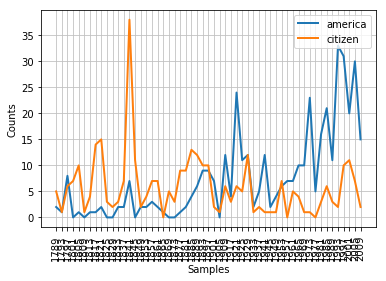

In [25]:
import nltk

from nltk.corpus import inaugural

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)) 
cfd.plot()

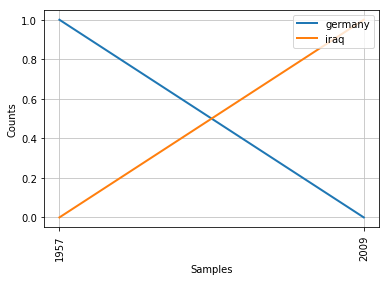

In [26]:
import nltk

from nltk.corpus import inaugural

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['iraq', 'germany']
    if w.lower().startswith(target)) 
cfd.plot()

This produces a plot of a Conditional Frequency Distribution: all words in the Inaugural Address Corpus that begin with `america` or `citizen` are counted; separate counts are kept for each address; these are plotted so that trends in usage over time can be observed; counts are not normalized for document length.

### 1.6 Annotated Text Corpora

Many text corpora contain linguistic annotations, representing POS tags, named entities, syntactic structures, semantic roles, and so forth

| Corpus                                | Compiler              | Contents                                                    |
| ------------------------------------- | --------------------- | ----------------------------------------------------------- |
| Brown Corpus                          | Francis, Kucera       | 15 genres, 1.15M words, tagged, categorized                 |
| CESS Treebanks                        | CLiC-UB               | 1M words, tagged and parsed (Catalan, Spanish)              |
| Chat-80 Data Files                    | Pereira & Warren      | World Geographic Database                                   |
| CMU Pronouncing Dictionary            | CMU                   | 127k entries                                                |
| CoNLL 2000 Chunking Data              | CoNLL                 | 270k words, tagged and chunked                              |
| CoNLL 2002 Named Entity               | CoNLL                 | 700k words, pos- and named-entity-tagged (Dutch, Spanish)   |
| CoNLL 2007 Dependency Treebanks (sel) | CoNLL                 | 150k words, dependency parsed (Basque, Catalan)             |
| Dependency Treebank                   | Narad                 | Dependency parsed version of Penn Treebank sample           |
| FrameNet                              | Fillmore, Baker et al | 10k word senses, 170k manually annotated sentences          |
| Floresta Treebank                     | Diana Santos et al    | 9k sentences, tagged and parsed (Portuguese)                |
| Gazetteer Lists                       | Various               | Lists of cities and countries                               |
| Genesis Corpus                        | Misc web sources      | 6 texts, 200k words, 6 languages                            |
| Gutenberg (selections)                | Hart, Newby, et al    | 18 texts, 2M words                                          |
| Inaugural Address Corpus              | CSpan                 | US Presidential Inaugural Addresses (1789-present)          |
| Indian POS-Tagged Corpus              | Kumaran et al         | 60k words, tagged (Bangla, Hindi, Marathi, Telugu)          |
| MacMorpho Corpus                      | NILC, USP, Brazil     | 1M words, tagged (Brazilian Portuguese)                     |
| Movie Reviews                         | Pang, Lee             | 2k movie reviews with sentiment polarity classification     |
| Names Corpus                          | Kantrowitz, Ross      | 8k male and female names                                    |
| NIST 1999 Info Extr (selections)      | Garofolo              | 63k words, newswire and named-entity SGML markup            |
| Nombank                               | Meyers                | 115k propositions, 1400 noun frames                         |
| NPS Chat Corpus                       | Forsyth, Martell      | 10k IM chat posts, POS-tagged and dialogue-act tagged       |
| Open Multilingual WordNet             | Bond et al            | 15 languages, aligned to English WordNet                    |
| PP Attachment Corpus                  | Ratnaparkhi           | 28k prepositional phrases, tagged as noun or verb modifiers |
| Proposition Bank                      | Palmer                | 113k propositions, 3300 verb frames                         |
| Question Classification               | Li, Roth              | 6k questions, categorized                                   |
| Reuters Corpus                        | Reuters               | 1.3M words, 10k news documents, categorized                 |
| Roget's Thesaurus                     | Project Gutenberg     | 200k words, formatted text                                  |
| RTE Textual Entailment                | Dagan et al           | 8k sentence pairs, categorized                              |
| SEMCOR                                | Rus, Mihalcea         | 880k words, part-of-speech and sense tagged                 |
| Senseval 2 Corpus                     | Pedersen              | 600k words, part-of-speech and sense tagged                 |
| SentiWordNet                          | Esuli, Sebastiani     | sentiment scores for 145k WordNet synonym sets              |
| Shakespeare texts (selections)        | Bosak                 | 8 books in XML format                                       |
| State of the Union Corpus             | CSPAN                 | 485k words, formatted text                                  |
| Stopwords Corpus                      | Porter et al          | 2,400 stopwords for 11 languages                            |
| Swadesh Corpus                        | Wiktionary            | comparative wordlists in 24 languages                       |
| Switchboard Corpus (selections)       | LDC                   | 36 phonecalls, transcribed, parsed                          |
| Univ Decl of Human Rights             | United Nations        | 480k words, 300+ languages                                  |
| Penn Treebank (selections)            | LDC                   | 40k words, tagged and parsed                                |
| TIMIT Corpus (selections)             | NIST/LDC              | audio files and transcripts for 16 speakers                 |
| VerbNet 2.1                           | Palmer et al          | 5k verbs, hierarchically organized, linked to WordNet       |
| Wordlist Corpus                       | OpenOffice.org et al  | 960k words and 20k affixes for 8 languages                  |
| WordNet 3.0 (English)                 | Miller, Fellbaum      | 145k synonym sets                                           |


### 1.7 Corpora in Other Languages

NLTK comes with corpora for many languages, though in some cases you will need to learn how to manipulate character encodings in Python before using these corpora 

CESS Treebanks (Catalan, Spanish):

In [27]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

Floresta Treebank (Portuguese):

In [28]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

Indian POS-Tagged Corpus:

In [29]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

Univ Decl of Human Rights (UNO):

In [30]:
print(nltk.corpus.udhr.fileids())

['Abkhaz-Cyrillic+Abkh', 'Abkhaz-UTF8', 'Achehnese-Latin1', 'Achuar-Shiwiar-Latin1', 'Adja-UTF8', 'Afaan_Oromo_Oromiffa-Latin1', 'Afrikaans-Latin1', 'Aguaruna-Latin1', 'Akuapem_Twi-UTF8', 'Albanian_Shqip-Latin1', 'Amahuaca', 'Amahuaca-Latin1', 'Amarakaeri-Latin1', 'Amuesha-Yanesha-UTF8', 'Arabela-Latin1', 'Arabic_Alarabia-Arabic', 'Asante-UTF8', 'Ashaninca-Latin1', 'Asheninca-Latin1', 'Asturian_Bable-Latin1', 'Aymara-Latin1', 'Balinese-Latin1', 'Bambara-UTF8', 'Baoule-UTF8', 'Basque_Euskara-Latin1', 'Batonu_Bariba-UTF8', 'Belorus_Belaruski-Cyrillic', 'Belorus_Belaruski-UTF8', 'Bemba-Latin1', 'Bengali-UTF8', 'Beti-UTF8', 'Bichelamar-Latin1', 'Bikol_Bicolano-Latin1', 'Bora-Latin1', 'Bosnian_Bosanski-Cyrillic', 'Bosnian_Bosanski-Latin2', 'Bosnian_Bosanski-UTF8', 'Breton-Latin1', 'Bugisnese-Latin1', 'Bulgarian_Balgarski-Cyrillic', 'Bulgarian_Balgarski-UTF8', 'Cakchiquel-Latin1', 'Campa_Pajonalino-Latin1', 'Candoshi-Shapra-Latin1', 'Caquinte-Latin1', 'Cashibo-Cacataibo-Latin1', 'Cashinahua-

The last of these corpora, `udhr`, contains the Universal Declaration of Human Rights in over 300 languages. The fileids for this corpus include information about the character encoding used in the file, such as UTF8 or Latin1. Let's use a conditional frequency distribution to examine the differences in word lengths for a selection of languages included in the udhr corpus.

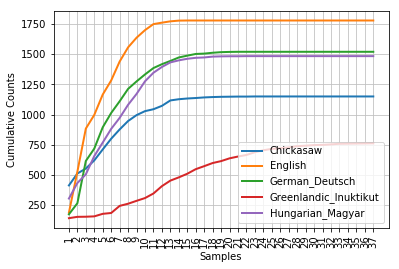

In [31]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar']
cfd = nltk.ConditionalFreqDist(
           (lang, len(word))
           for lang in languages
           for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)



### Excercise
<div class="alert alert-info">
Pick a language of interest in <code>udhr.fileids()</code>, and define a variable <code>raw_text = udhr.raw(Language-Latin1)</code>. Now plot a frequency distribution of the letters of the text using <code>nltk.FreqDist(raw_text).plot().
</div>

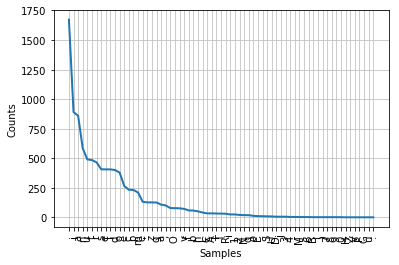

In [32]:
from nltk.corpus import udhr
raw_text = udhr.raw('Sammarinese-Latin1')
nltk.FreqDist(raw_text).plot()



### 1.8   Text Corpus Structure

<img src="http://www.nltk.org/images/text-corpus-structure.png"/>
Source: http://www.nltk.org/book/

Common Structures for Text Corpora: The simplest kind of corpus is a collection of isolated texts with no particular organization; some corpora are structured into categories like genre (Brown Corpus); some categorizations overlap, such as topic categories (Reuters Corpus); other corpora represent language use over time (Inaugural Address Corpus).

| Example                     | Description                                               |
| --------------------------- | --------------------------------------------------------- |
| `fileids()`                 | the files of the corpus                                   |
| `fileids([categories])`     | the files of the corpus corresponding to these categories |
| `categories()`              | the categories of the corpus                              |
| `categories([fileids])`     | the categories of the corpus corresponding to these files |
| `raw()`                     | the raw content of the corpus                             |
| `raw(fileids=[f1,f2,f3])`   | the raw content of the specified files                    |
| `raw(categories=[c1,c2])`   | the raw content of the specified categories               |
| `words()`                   | the words of the whole corpus                             |
| `words(fileids=[f1,f2,f3])` | the words of the specified fileids                        |
| `words(categories=[c1,c2])` | the words of the specified categories                     |
| `sents()`                   | the sentences of the whole corpus                         |
| `sents(fileids=[f1,f2,f3])` | the sentences of the specified fileids                    |
| `sents(categories=[c1,c2])` | the sentences of the specified categories                 |
| `abspath(fileid)`           | the location of the given file on disk                    |
| `encoding(fileid)`          | the encoding of the file (if known)                       |
| `open(fileid)`              | open a stream for reading the given corpus file           |
| `root`                      | if the path to the root of locally installed corpus       |
| `readme()`                  | the contents of the README file of the corpus             |


We illustrate the difference between some of the corpus access methods below:

In [33]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:20]

'The Adventures of B'

In [34]:
words = gutenberg.words("burgess-busterbrown.txt")
print(words[1:20])

['The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']', 'I', 'BUSTER', 'BEAR', 'GOES', 'FISHING', 'Buster', 'Bear']


In [35]:
sents = gutenberg.sents("burgess-busterbrown.txt")
print(sents[1:20])

[['I'], ['BUSTER', 'BEAR', 'GOES', 'FISHING'], ['Buster', 'Bear', 'yawned', 'as', 'he', 'lay', 'on', 'his', 'comfortable', 'bed', 'of', 'leaves', 'and', 'watched', 'the', 'first', 'early', 'morning', 'sunbeams', 'creeping', 'through', 'the', 'Green', 'Forest', 'to', 'chase', 'out', 'the', 'Black', 'Shadows', '.'], ['Once', 'more', 'he', 'yawned', ',', 'and', 'slowly', 'got', 'to', 'his', 'feet', 'and', 'shook', 'himself', '.'], ['Then', 'he', 'walked', 'over', 'to', 'a', 'big', 'pine', '-', 'tree', ',', 'stood', 'up', 'on', 'his', 'hind', 'legs', ',', 'reached', 'as', 'high', 'up', 'on', 'the', 'trunk', 'of', 'the', 'tree', 'as', 'he', 'could', ',', 'and', 'scratched', 'the', 'bark', 'with', 'his', 'great', 'claws', '.'], ['After', 'that', 'he', 'yawned', 'until', 'it', 'seemed', 'as', 'if', 'his', 'jaws', 'would', 'crack', ',', 'and', 'then', 'sat', 'down', 'to', 'think', 'what', 'he', 'wanted', 'for', 'breakfast', '.'], ['While', 'he', 'sat', 'there', ',', 'trying', 'to', 'make', 'up

### 1.9  Loading your own Corpus

If you have your own collection of text files that you would like to access using the above methods, you can easily load them with the help of NLTK's `PlaintextCorpusReader`. Check the location of your files on your file system; in the following example, we have taken this to be the directory `/Users/siehan/sandbox/example_corpus/`. 

In [36]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = 'C:/Users/jmitrovic/Desktop/TMP2017/CORPUS/'

Whatever the location, set this to be the value of corpus_root. The second parameter of the PlaintextCorpusReader initializer can be a list of fileids, like `['a.txt', 'test/b.txt']`, or a pattern that matches all fileids, like `'[abc]/.*\.txt'` (more on Regular Expressions later)

In [37]:
files = PlaintextCorpusReader(corpus_root, '.*')
files.fileids()
files.sents(fileids='text1.txt')

[['this', 'is', 'the', 'first', 'text', '.']]

## 2. Conditional Frequency Distributions

When the texts of a corpus are divided into several categories, by genre, topic, author, etc, we can maintain separate frequency distributions for each category. This will allow us to study systematic differences between the categories.

We achieve this using NLTK's `ConditionalFreqDist` data type. A conditional frequency distribution is a collection of frequency distributions, each one for a different "condition". The condition will often be the category of the text.

<img src="http://www.nltk.org/images/tally2.png"/>
Source: http://www.nltk.org/book/

The image depicts a fragment of a conditional frequency distribution having just two conditions, one for news text and one for romance text.

### 2.1   Conditions and Events

A frequency distribution counts observable events, such as the appearance of words in a text. A conditional frequency distribution needs to pair each event with a condition

So instead of processing a sequence of words

In [38]:
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said']
text

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said']

we have to process a sequence of pairs

In [39]:
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County')]
pairs

[('news', 'The'), ('news', 'Fulton'), ('news', 'County')]

### 2.2   Counting Words by Genre

In [40]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))

Whereas FreqDist() takes a simple list as input, ConditionalFreqDist() takes a list of pairs.

Let's break this down, and look at just two genres, news and romance. For each genre [line 2], we loop over every word in the genre [line 3], producing pairs consisting of the genre and the word [line 1]:

In [41]:
genre_word = [(genre, word) # line 1
    for genre in ['news', 'romance'] # line 2
        for word in brown.words(categories=genre)] # line 3
len(genre_word)

170576

So, as we can see below, pairs at the beginning of the list `genre_word` will be of the form `('news', word)` 

In [42]:
print(genre_word[:4])

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]


while those at the end will be of the form `('romance', word)` 

In [43]:
print(genre_word[-4:])

[('romance', 'afraid'), ('romance', 'not'), ('romance', "''"), ('romance', '.')]


We can now use this list of pairs to create a ConditionalFreqDist, and save it in a variable `cfd`.  As usual, we can type the name of the variable to inspect it

In [44]:
cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd)

<ConditionalFreqDist with 2 conditions>


and verify it has two conditions

In [45]:
cfd.conditions()

['news', 'romance']

Let's access the two conditions, and make sure that each is just a frequency distribution:

In [46]:
print(cfd['news'])

<FreqDist with 14394 samples and 100554 outcomes>


In [51]:
print(cfd['romance'])

<FreqDist with 8452 samples and 70022 outcomes>


In [47]:
print(cfd['romance'].most_common(20))

[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]


In [48]:
cfd['romance']['could']

193

### 2.3   Plotting and Tabulating Distributions

Apart from combining two or more frequency distributions, and being easy to initialize, a `ConditionalFreqDist` provides some useful methods for tabulation and plotting.

The condition is either of the words america or citizen **[2]**, and the counts being plotted are the number of times the word occured in a particular speech. It exploits the fact that the filename for each speech, e.g., `1865-Lincoln.txt` contains the year as the first four characters **[1]**. This code generates the pair `('america', '1865')` for every instance of a word whose lowercased form starts with *america* — such as *Americans* — in the file `1865-Lincoln.txt`.

In [49]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4]) # [1]
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen'] # [2]
    if w.lower().startswith(target))
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'america': FreqDist({'1789': 2,
                               '1793': 1,
                               '1797': 8,
                               '1805': 1,
                               '1813': 1,
                               '1817': 1,
                               '1821': 2,
                               '1833': 2,
                               '1837': 2,
                               '1841': 7,
                               '1849': 2,
                               '1853': 2,
                               '1857': 3,
                               '1861': 2,
                               '1865': 1,
                               '1877': 1,
                               '1881': 2,
                               '1885': 4,
                               '1889': 6,
                               '1893': 9,
                               '1897': 9,
                               '1901': 7,
                  

This time, the condition is the name of the language and the counts being plotted are derived from word lengths **[1]**. It exploits the fact that the filename for each language is the language name followed by `'-Latin1'`
(the character encoding).

In [55]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word)) # [1]
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
cfd

ConditionalFreqDist(nltk.probability.FreqDist,
                    {'Chickasaw': FreqDist({1: 411,
                               2: 99,
                               3: 41,
                               4: 68,
                               5: 91,
                               6: 89,
                               7: 77,
                               8: 70,
                               9: 49,
                               10: 33,
                               11: 16,
                               12: 28,
                               13: 45,
                               14: 10,
                               15: 6,
                               16: 4,
                               17: 5,
                               18: 3,
                               19: 2,
                               20: 1,
                               21: 1,
                               23: 1}),
                     'English': FreqDist({1: 185,
                               2: 340,
       

In the `plot()` and `tabulate()` methods, we can optionally specify which conditions to display with a `conditions= parameter`. When we omit it, we get all the conditions. Similarly, we can limit the samples to display with a `samples= parameter`. This makes it possible to load a large quantity of data into a conditional frequency distribution, and then to explore it by plotting or tabulating selected conditions and samples. It also gives us full control over the order of conditions and samples in any displays. For example, we can tabulate the cumulative frequency data just for two languages, and for words less than 10 characters long, as shown below. We interpret the last cell on the top row to mean that 1,638 words of the English text have 9 or fewer letters.

In [56]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],
             samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


### Excercise
<div class="alert alert-info">
Working with the news and romance genres from the Brown Corpus, find out which days of the week are most newsworthy, and which are most romantic. Define a variable called days containing a list of days of the week, i.e. <code>['Monday', ...]</code>. Now tabulate the counts for these words using <code>cfd.tabulate(samples=days)</code>. Now try the same thing using plot in place of <code>tabulate</code>. You may control the output order of days with the help of an extra parameter: <code>samples=['Monday', ...].</code>
</div>

In [50]:
import nltk
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news',  'romance']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
cfd.tabulate(conditions=genres, samples=days)

           Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday 
   news        54        43        22        20        41        33        51 
romance         2         3         3         1         3         4         5 


You may have noticed that the multi-line expressions we have been using with conditional frequency distributions look like **list comprehensions**, but without the brackets. In general, when we use a list comprehension as a parameter to a function, like `set([w.lower() for w in t])`, we are permitted to omit the square brackets and just write: `set(w.lower() for w in t)`.

### 2.4   Generating Random Text with Bigrams

We can use a conditional frequency distribution to create a table of bigrams (word pairs). The `bigrams()` function takes a list of words and builds a list of consecutive word pairs. Remember that, in order to see the result and not a cryptic "generator object", we need to use the `list()` function:

In [51]:
sent = ['In', 'the', 'beginning', 'God', 'created', 
        'the', 'heaven', 'and', 'the', 'earth', '.']
list(nltk.bigrams(sent))

[('In', 'the'),
 ('the', 'beginning'),
 ('beginning', 'God'),
 ('God', 'created'),
 ('created', 'the'),
 ('the', 'heaven'),
 ('heaven', 'and'),
 ('and', 'the'),
 ('the', 'earth'),
 ('earth', '.')]

In 2.2, we treat each word as a condition, and for each one we effectively create a frequency distribution over the following words. The function `generate_model()` contains a simple loop to generate text. When we call the function, we choose a word (such as *'living'*) as our initial context, then once inside the loop, we print the current value of the variable word, and reset word to be the most likely token in that context (using `max()`); next time through the loop, we use that word as our new context. As you can see by inspecting the output, this simple approach to text generation tends to get stuck in loops; another method would be to randomly choose the next word from among the available words.

In [52]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=" ")
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
cfd['living']
# generate_model(cfd, 'living')
nltk.corpus.genesis.fileids()

['english-kjv.txt',
 'english-web.txt',
 'finnish.txt',
 'french.txt',
 'german.txt',
 'lolcat.txt',
 'portuguese.txt',
 'swedish.txt']

Generating Random Text: this program obtains all bigrams from the text of the book of Genesis, then constructs a conditional frequency distribution to record which words are most likely to follow a given word; e.g., after the word living, the most likely word is creature; the `generate_model()` function uses this data, and a seed word, to generate random text.

| Example                                | Description                                                          |
| -------------------------------------- | -------------------------------------------------------------------- |
| `cfdist = ConditionalFreqDist(pairs)`  | create a conditional frequency distribution from a list of pairs     |
| `cfdist.conditions()`                  | the conditions                                                       |
| `cfdist[condition]`                    | the frequency distribution for this condition                        |
| `cfdist[condition][sample]`            | frequency for the given sample for this condition                    |
| `cfdist.tabulate()`                    | tabulate the conditional frequency distribution                      |
| `cfdist.tabulate(samples, conditions)` | tabulation limited to the specified samples and conditions           |
| `cfdist.plot()`                        | graphical plot of the conditional frequency distribution             |
| `cfdist.plot(samples, conditions)`     | graphical plot limited to the specified samples and conditions       |
| `cfdist1 < cfdist2`                    | test if samples in `cfdist1` occur less frequently than in `cfdist2` |

## 3   More Python: Reusing Code

### 3.1   Creating Programs with a Text Editor

The Python interactive interpreter performs your instructions as soon as you type them. Often, it is better to compose a multi-line program using a text editor, then ask Python to run the whole program at once. 

The computers in the lab have the IDE `PyCharm` installed.

### 3.2   Functions

A function is usually defined to take some inputs, using special variables known as parameters, and it may produce a result, also known as a **return value**. We define a function using the keyword **def** followed by the function name and any input parameters, followed by the body of the function. 

In [53]:
def lexical_diversity(text):
    return len(text) / len(set(text))

We use the keyword `return` to indicate the value that is produced as output by the function. In the above example, all the work of the function is done in the return statement. Here's an equivalent definition which does the same work using multiple lines of code. We'll change the parameter name from `text` to `my_text_data` to remind you that this is an arbitrary choice:

In [54]:
def lexical_diversity(my_text_data):
        word_count = len(my_text_data)
        vocab_size = len(set(my_text_data))
        diversity_score = vocab_size / word_count
        return diversity_score

Notice that we've created some new variables inside the body of the function. These are **local variables** and are not accessible outside the function. So now we have defined a function with the name `lexical_diversity`. But just defining it won't produce any output! Functions do nothing until they are "called" (or "invoked"):

In [55]:
from nltk.corpus import genesis
kjv = genesis.words('english-kjv.txt')
lexical_diversity(kjv)

0.06230453042623537

Let's return to our earlier scenario, and actually define a simple function to work out English plurals. The function `plural()` takes a singular noun and generates a plural form, though it is not always correct.

In [56]:
def plural(word):
    if word.endswith('y'):
        return word[:-1] + 'ies'
    elif word[-1] in 'sx' or word[-2:] in ['sh', 'ch']:
        return word + 'es'
    elif word.endswith('an'):
        return word[:-2] + 'en'
    else:
        return word + 's'

In [57]:
plural('fairy')

'fairies'

In [58]:
plural('girl')

'girls'

The `endswith()` function is always associated with a string object. To call such functions, we give the name of the object, a period, and then the name of the function. These functions are usually known as **methods**.

### 3.3   Modules

Over time you will find that you create a variety of useful little text processing functions, and you end up copying them from old programs to new ones. Which file contains the latest version of the function you want to use? It makes life a lot easier if you can collect your work into a single place, and access previously defined functions without making copies.

First we have a look into the $PYTHONPATH, where modules can be located

In [59]:
import sys
sys.path

['',
 'C:\\Users\\jmitrovic\\Anaconda3\\python36.zip',
 'C:\\Users\\jmitrovic\\Anaconda3\\DLLs',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib',
 'C:\\Users\\jmitrovic\\Anaconda3',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.6.egg',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\Users\\jmitrovic\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\jmitrovic\\.ipython']

Save your function(s) in a file called (say) `text_proc.py` within the PYTHONPATH. Now, you can access your work simply by importing it from the file:

In [61]:
from text_proc import plural
plural('wish')

'wishes'

In [62]:
plural('fan')

'fen'

A collection of variable and function definitions in a file is called a Python **module**. A collection of related modules is called a **package**. NLTK's code for processing the Brown Corpus is an example of a module, and its collection of code for processing all the different corpora is an example of a package. NLTK itself is a set of packages, sometimes called a **library**.

## 4   Lexical Resources

<img src="http://www.nltk.org/images/lexicon.png"/>
Source: http://www.nltk.org/book/

A lexicon, or lexical resource, is a collection of words and/or phrases along with associated information such as part of speech and sense definitions. Lexical resources are secondary to texts, and are usually created and enriched with the help of texts.

For example, if we have defined a text `my_text`, then `vocab = sorted(set(my_text))` builds the vocabulary of `my_text`, while `word_freq = FreqDist(my_text)` counts the frequency of each word in the text. Both of `vocab` and `word_freq` are simple **lexical resources**. 

Similarly, a concordance gives us information about word usage that might help in the preparation of a dictionary. Standard terminology for lexicons is illustrated in the image above.

A lexical entry consists of a *headword* (also known as a *lemma*) along with additional information such as the part of speech and the sense definition. Two distinct words having the same spelling are called **homonyms**.

The simplest kind of lexicon is nothing more than a sorted list of words. Sophisticated lexicons include complex structure within and across the individual entries.

### 4.1   Wordlist Corpora

NLTK includes some corpora that are nothing more than wordlists. The Words Corpus is the `/usr/share/dict/words` file from Unix, used by some spell checkers. We can use it to find unusual or mis-spelt words in a text corpus.

In [63]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt')))

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced', 'acquitted', 'acquitting', 'acted', 'actions', 'adapted', 'adding', 'additions', 'addressed', 'addresses', 'addressing', 'adhering', 'adieus', 'adjusting', 'administering', 'admirers', 'admires', 'admitting', 'adorned', 'advances', 'advantages', 'affairs', 'affections', 'affects', 'affixed', 'afflictions', 'afforded', 'affording', 'ages', 'agitated', 'agonies', 'ailments', 'aimed', 'alarms', 'alienated', 'alighted', 'alleged', 'allenham', 'allowances', 'allowed', 'allowing', 'alluded', 'alterations', 'altered', 'altering', 'amended', 'amounted', 'amusements', 'ankles', 'annamaria', 'annexed', 'announced', 'announcing', 'annuities', 'annum', 'answered', 'answering', 'answers', 'anticipated', 'anticipating', 'antici

 Filtering a Text: this program computes the vocabulary of a text, then removes all items that occur in an existing wordlist, leaving just the uncommon or mis-spelt words.

In [64]:
print(unusual_words(nltk.corpus.nps_chat.words()))

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', 'aggravated', 'agurlwithbigguns', 'ahah', 'ahahah', 'ahahh', 'ahahha', 'ahh', 'ahhah', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'aiiiiiiiiiiiiiiiiiiiiiiii', 'aiken', 'aime', 'akdt', 'akon', 'akron', 'akst', 'aligator', 'allergies', 'allo', 'allowed', 'aloha', 'alohaaa', 'alohas', 'alot', 'alotta', 'alternatives', 'alterz', 'alwys', 'alzheimers', 'amazingness', 'americans', 'anithing', 'ans', 'answering', 'answers', 'antidepressants', 'anygirl', 'anymore', 'anythin', 'anytime', 'anyyyyyyyyyyyyyyyyy', 'aok', 'apoligize', 'appearently', 'appears', 'applaudes', 'appleton', 'appologise', 'appologize', 'aqwesome', 'arggghhh', 'argh', 'armtnpeat', 'arrested', 'arrived', 'arround', 'asked', 'askin', 'asking', 'asks', 'asl', 'asnwer', 

There is also a corpus of **stopwords**, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [65]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [66]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

Let's define a function to compute what fraction of words in a text are not in the stopwords list:

In [67]:
def content_fraction(text):
     stopwords = nltk.corpus.stopwords.words('english')
     content = [w for w in text if w.lower() not in stopwords]
     return len(content) / len(text)

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

<img src="http://www.nltk.org/images/target.png"/>
Source: http://www.nltk.org/book/

A wordlist is useful for solving word puzzles. Our program iterates through every word and, for each one, checks whether it meets the conditions. It is easy to check obligatory letter [2] and length constraints [1] (and we'll only look for words with six or more letters here). It is trickier to check that candidate solutions only use combinations of the supplied letters, especially since some of the supplied letters appear twice (here, the letter v). The FreqDist comparison method [3] permits us to check that the frequency of each letter in the candidate word is less than or equal to the frequency of the corresponding letter in the puzzle.

In [68]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
[w for w in wordlist if len(w) >= 6# [1] 
    and obligatory in w # [2] 
    and nltk.FreqDist(w) <= puzzle_letters] # [3]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:

In [69]:
names = nltk.corpus.names
names.fileids()
male_names = names.words('male.txt')
female_names = names.words('female.txt')
print([w for w in male_names if w in female_names])

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny', 'Do

It is well known that names ending in the letter 'a' are almost always female. We can see this and some other patterns in the following graph, produced by the following code. Remember that name[-1] is the last letter of `name`.

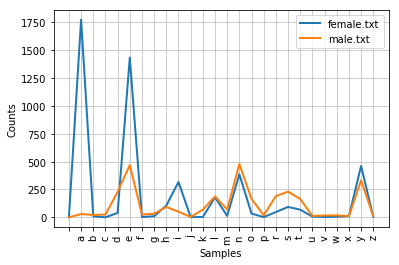

In [70]:
names = nltk.corpus.names
cfd = nltk.ConditionalFreqDist(
          (fileid, name[-1])
          for fileid in names.fileids()
          for name in names.words(fileid))
cfd.plot()

Conditional Frequency Distribution: this plot shows the number of female and male names ending with each letter of the alphabet; most names ending with `a`, `e` or `i` are female; names ending in `h` and `l` are equally likely to be male or female; names ending in `k`, `o`, `r`, `s`, and `t` are likely to be male.

### 4.2   A Pronouncing Dictionary

A slightly richer kind of lexical resource is a table (or spreadsheet), containing a word plus some properties in each row. NLTK includes the CMU Pronouncing Dictionary for US English, which was designed for use by speech synthesizers.

In [71]:
entries = nltk.corpus.cmudict.entries()
len(entries)

133737

In [72]:
for entry in entries[42371:42379]:
    print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


### 4.3 Comparative Wordlists

In [73]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [74]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [105]:
fr2en = swadesh.entries(['fr', 'en'])
print(fr2en)

[('je', 'I'), ('tu, vous', 'you (singular), thou'), ('il', 'he'), ('nous', 'we'), ('vous', 'you (plural)'), ('ils, elles', 'they'), ('ceci', 'this'), ('cela', 'that'), ('ici', 'here'), ('là', 'there'), ('qui', 'who'), ('quoi', 'what'), ('où', 'where'), ('quand', 'when'), ('comment', 'how'), ('ne...pas', 'not'), ('tout', 'all'), ('plusieurs', 'many'), ('quelques', 'some'), ('peu', 'few'), ('autre', 'other'), ('un', 'one'), ('deux', 'two'), ('trois', 'three'), ('quatre', 'four'), ('cinq', 'five'), ('grand', 'big'), ('long', 'long'), ('large', 'wide'), ('épais', 'thick'), ('lourd', 'heavy'), ('petit', 'small'), ('court', 'short'), ('étroit', 'narrow'), ('mince', 'thin'), ('femme', 'woman'), ('homme', 'man (adult male)'), ('homme', 'man (human being)'), ('enfant', 'child'), ('femme, épouse', 'wife'), ('mari, époux', 'husband'), ('mère', 'mother'), ('père', 'father'), ('animal', 'animal'), ('poisson', 'fish'), ('oiseau', 'bird'), ('chien', 'dog'), ('pou', 'louse'), ('serpent', 'snake'), ('v

In [76]:
from nltk.corpus import swadesh
fr2en = swadesh.entries(['fr', 'en'])
translate = dict(fr2en)
translate['chien']



'dog'

In [77]:
translate['jeter']

'throw'

In [78]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
translate['Hund']

'dog'

In [79]:
translate['perro']

'dog'

In [80]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
    print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


### 4.4 Shoebox and Toolbox Lexicons

In [81]:
from nltk.corpus import toolbox
toolbox.entries('rotokas.dic')

[('kaa',
  [('ps', 'V'),
   ('pt', 'A'),
   ('ge', 'gag'),
   ('tkp', 'nek i pas'),
   ('dcsv', 'true'),
   ('vx', '1'),
   ('sc', '???'),
   ('dt', '29/Oct/2005'),
   ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'),
   ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'),
   ('xe', 'Apoka is gagging from food while talking.')]),
 ('kaa',
  [('ps', 'V'),
   ('pt', 'B'),
   ('ge', 'strangle'),
   ('tkp', 'pasim nek'),
   ('arg', 'O'),
   ('vx', '2'),
   ('dt', '07/Oct/2006'),
   ('ex', 'Rera rauroro rera kaarevoi.'),
   ('xp', 'Em i holim pas em na nekim em.'),
   ('xe', 'He is holding him and strangling him.'),
   ('ex', 'Iroiro-ia oirato okoearo kaaivoi uvare rirovira kaureoparoveira.'),
   ('xp', 'Ol i pasim nek bilong man long rop bikos em i save bikhet tumas.'),
   ('xe',
    "They strangled the man's neck with rope because he was very stubborn and arrogant."),
   ('ex',
    'Oirato okoearo kaaivoi iroiro-ia. Uva viapau uvuiparoi ra vovouparo uva kopiiroi.'),
 

## 5. Wordnet

## 5.1   Senses and Synonyms

In [82]:
import nltk
from nltk.corpus import wordnet as wn
wn.synset('car.n.01').examples()


['he needs a car to get to work']

In [83]:
for synset in wn.synsets('cat'):
     print(synset.lemma_names())

['cat', 'true_cat']
['guy', 'cat', 'hombre', 'bozo']
['cat']
['kat', 'khat', 'qat', 'quat', 'cat', 'Arabian_tea', 'African_tea']
["cat-o'-nine-tails", 'cat']
['Caterpillar', 'cat']
['big_cat', 'cat']
['computerized_tomography', 'computed_tomography', 'CT', 'computerized_axial_tomography', 'computed_axial_tomography', 'CAT']
['cat']
['vomit', 'vomit_up', 'purge', 'cast', 'sick', 'cat', 'be_sick', 'disgorge', 'regorge', 'retch', 'puke', 'barf', 'spew', 'spue', 'chuck', 'upchuck', 'honk', 'regurgitate', 'throw_up']


In [84]:
import nltk
from nltk.corpus import wordnet as wn
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

### Excercise
<div class="alert alert-info">
Write down all the senses of the word **dish** that you can think of. Now, explore this word with the help of `WordNet`, using the same operations we used above
</div>

### 5.2   The WordNet Hierarchy

<img src="http://www.nltk.org/images/wordnet-hierarchy.png"/>
Source: http://www.nltk.org/book/

In [85]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar[0]

Synset('ambulance.n.01')

In [86]:
print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()))

['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact', 'compact_car', 'convertible', 'coupe', 'cruiser', 'electric', 'electric_automobile', 'electric_car', 'estate_car', 'gas_guzzler', 'hack', 'hardtop', 'hatchback', 'heap', 'horseless_carriage', 'hot-rod', 'hot_rod', 'jalopy', 'jeep', 'landrover', 'limo', 'limousine', 'loaner', 'minicar', 'minivan', 'pace_car', 'patrol_car', 'phaeton', 'police_car', 'police_cruiser', 'prowl_car', 'race_car', 'racer', 'racing_car', 'roadster', 'runabout', 'saloon', 'secondhand_car', 'sedan', 'sport_car', 'sport_utility', 'sport_utility_vehicle', 'sports_car', 'squad_car', 'station_waggon', 'station_wagon', 'stock_car', 'subcompact', 'subcompact_car', 'taxi', 'taxicab', 'tourer', 'touring_car', 'two-seater', 'used-car', 'waggon', 'wagon']


In [87]:
motorcar.hypernyms()
paths = motorcar.hypernym_paths()

In [88]:
len(paths)

2

In [89]:
print([synset.name() for synset in paths[0]])

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']


In [90]:
print([synset.name() for synset in paths[1]])

['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'conveyance.n.03', 'vehicle.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']


In [91]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

### Excercise
<div class="alert alert-info">
Try out NLTK's convenient graphical WordNet browser: `nltk.app.wordnet()`. Explore the WordNet hierarchy by following the hypernym and hyponym links.
</div>

### 5.3 More Lexical Relations

**Hypernyms** and **hyponyms** are called lexical relations because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (**meronyms**) or to the things they are contained in (**holonyms**). For example, the parts of a tree are its trunk, crown, and so on; the `part_meronyms()`. The substance a tree is made of includes heartwood and sapwood; the `substance_meronyms()`. A collection of trees forms a forest; the `member_holonyms()`:

* colour is a **hypernym** of red. word with a broad meaning.
* spoon is a **hyponym** of cutlery. a word of more specific meaning.
* apple is a **meronym** of apple tree. A word that denotes a constituent part or a member of something. 
* Apple tree is a **holonym** of apple.

In [92]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [93]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [94]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [95]:
for synset in wn.synsets('mint', wn.NOUN):
     print(synset.name() + ':', synset.definition())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government


In [96]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [97]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

In [98]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

### 5.4   Semantic Similarity

In [99]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')
right.lowest_common_hypernyms(minke)



[Synset('baleen_whale.n.01')]

In [100]:
right.lowest_common_hypernyms(orca)


[Synset('whale.n.02')]

In [101]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [102]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

In [103]:
wn.synset('baleen_whale.n.01').min_depth()



14

In [104]:
wn.synset('whale.n.02').min_depth()

13

In [105]:
wn.synset('vertebrate.n.01').min_depth()

8

In [106]:
wn.synset('entity.n.01').min_depth()

0

In [107]:
right.path_similarity(minke)

0.25

In [108]:
right.path_similarity(tortoise)

0.07692307692307693

### Excercise
<div class="alert alert-info">
Several other similarity measures are available; you can type `help(wn)` for more information. NLTK also includes VerbNet, a hierarhical verb lexicon linked to WordNet. It can be accessed with `nltk.corpus.verbnet`.
</div>

## 6   Summary
* A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, `nltk.corpus.brown`.
* Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.
* A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.
* Python programs more than a few lines long should be entered using a text editor, saved to a file with a `.py` extension, and accessed using an `impor`t statement.
* Python functions permit you to associate a name with a particular block of code, and re-use that code as often as necessary.
* Some functions, known as "methods", are associated with an object and we give the object name followed by a period followed by the function, like this: `x.funct(y)`, e.g., `word.isalpha()`.
* To find out about some variable `v`, type `help(v)` in the Python interactive interpreter to read the help entry for this kind of object.
* WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.
* Some functions are not available by default, but must be accessed using Python's `import` statement.

## 8 Exercise
1. ☼ Create a variable `phrase` containing a list of words. Review the operations described in the previous chapter, including addition, multiplication, indexing, slicing, and sorting.
2. ☼ Use the corpus module to explore `austen-persuasion.txt`. How many word tokens does this book have? How many word types?
3. ☼ Use the Brown corpus reader `nltk.corpus.brown.words()` or the Web text corpus reader `nltk.corpus.webtext.words()` to access some sample text in two different genres.
4. ☼ Read in the texts of the _State of the Union_ addresses, using the `state_union` corpus reader. Count occurrences of `men`, `women`, and `people` in each document. What has happened to the usage of these words over time?
5. ☼ Investigate the holonym-meronym relations for some nouns. Remember that there are three kinds of holonym-meronym relation, so you need to use: `member_meronyms()`, `part_meronyms()`, `substance_meronyms()`, `member_holonyms()`, `part_holonyms()`, and `substance_holonyms()`.
6. ☼ In the discussion of comparative wordlists, we created an object called `translate` which you could look up using words in both German and Spanish in order to get corresponding words in English. What problem might arise with this approach? Can you suggest a way to avoid this problem?
7. ☼ According to Strunk and White's _Elements of Style_, the word however, used at the start of a sentence, means "in whatever way" or "to whatever extent", and not "nevertheless". They give this example of correct usage: However you advise him, he will probably do as he thinks best. (`http://www.bartleby.com/141/strunk3.html`) Use the concordance tool to study actual usage of this word in the various texts we have been considering. See also the _LanguageLog_ posting "Fossilized prejudices about 'however'" at `http://itre.cis.upenn.edu/~myl/languagelog/archives/001913.html`
8. ◑ Define a conditional frequency distribution over the Names corpus that allows you to see which _initial_ letters are more frequent for males vs. females (cf. 4.4).
9. ◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in _Moby Dick_ and in _Sense and Sensibility_?
10. ◑ Read the BBC News article: _UK's Vicky Pollards 'left behind'_ `http://news.bbc.co.uk/1/hi/education/6173441.stm`. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on _LanguageLog_, at `http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html`.
11. ◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?
12. ◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?
13. ◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.
14. ◑ Define a function `supergloss(s)` that takes a synset `s` as its argument and returns a string consisting of the concatenation of the definition of `s`, and the definitions of all the hypernyms and hyponyms of `s`.
15. ◑ Write a program to find all words that occur at least three times in the Brown Corpus.
16. ◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in [1.1][38]. Include the full set of Brown Corpus genres (`nltk.corpus.brown.categories()`). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?
17. ◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.
18. ◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.
19. ◑ Write a program to create a table of word frequencies by genre, like the one given in 1 for modals. Choose your own words and try to find words whose presence (or absence) is typical of a genre. Discuss your findings.
20. ◑ Write a function `word_freq()` that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.
21. ◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.
22. ◑ Define a function `hedge(text)` which processes a text and produces a new version with the word `'like'` between every third word.
23. ★ **Zipf's Law**: Let _f(w)_ be the frequency of a word _w_ in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. _f_ × _r = k_, for some constant _k_). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

    1. Write a function to process a large text and plot word frequency against word rank using `pylab.plot`. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
    2. Generate random text, e.g., using `random.choice("abcdefg")`, taking care to include the space character. You will need to `import random` first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?
    
24. ★ Modify the text generation program in 2.2 further, to do the following tasks:
    1. Store the _n_ most likely words in a list `words` then randomly choose a word from the list using `random.choice()`. (You will need to `import random` first.)
    2. Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.
    3. Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.
25. ★ Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the `udhr` corpus and limit your searches to files in the Latin-1 encoding.
26. ★ What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using `wn.all_synsets('n')`.
27. ★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun _dog_ has 7 senses with: `len(wn.synsets('dog', 'n'))`. Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.
28. ★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by [(Miller & Charles, 1998)][39]: car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.d